<a href="https://colab.research.google.com/github/yatrimodi/ml_learning_journey/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('/content/1.01. Simple linear regression.csv')
df

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


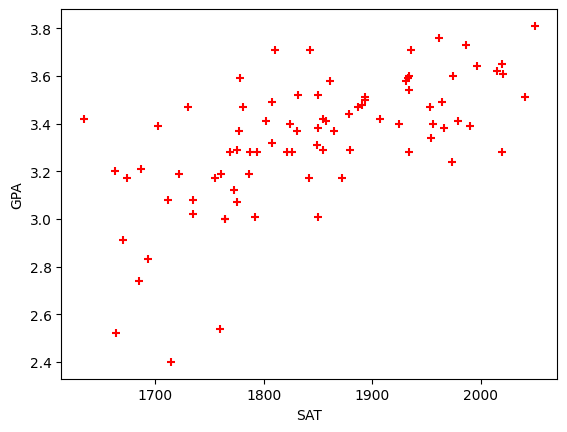

In [6]:
%matplotlib inline
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.scatter(df.SAT,df.GPA,color='red',marker='+')

In [7]:
new_df=df.drop('GPA',axis='columns')
new_df

,SAT
0,1714
1,1664
2,1760
3,1685
4,1693
...,...
79,1936
80,1810
81,1987
82,1962


In [8]:
model=linear_model.LinearRegression()
model.fit(new_df,df.GPA)

LinearRegression()

In [9]:
model.predict([[1740]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.15593751])

In [10]:
model.coef_

array([0.00165569])

In [11]:
model.intercept_

np.float64(0.2750402996602799)

In [12]:
0.00165569*1740+0.2750402996602799

3.15594089966028

In [14]:
df=pd.read_csv('/content/Salary_dataset.csv')
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


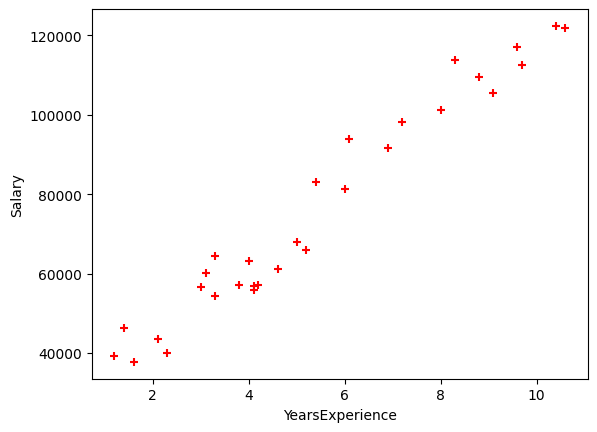

In [15]:
%matplotlib inline
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.scatter(df.YearsExperience,df.Salary,color='red',marker='+')

In [16]:
model=linear_model.LinearRegression()
model.fit(df.drop('Salary',axis='columns'),df.Salary)

LinearRegression()

In [17]:
model.predict([[30,2.5]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36683.26682607])

In [18]:
model.coef_

array([ -482.89177423, 10927.65812589])

In [23]:
df=pd.read_csv('/content/news_summary.csv', encoding='latin-1')
df

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...
...,...,...,...,...,...,...
4509,Mansha Mahajan,"24 Feb 2017,Friday",Rasna seeking ?250 cr revenue from snack categ...,http://indiatoday.intoday.in/story/rasna-eyes-...,Fruit juice concentrate maker Rasna is eyeing ...,"Mumbai, Feb 23 (PTI) Fruit juice concentrate m..."
4510,Dishant Sharma,"03 Aug 2017,Thursday",Sachin attends Rajya Sabha after questions on ...,http://indiatoday.intoday.in/story/sachin-tend...,Former Indian cricketer Sachin Tendulkar atten...,Former cricketer Sachin Tendulkar was spotted ...
4511,Tanya Dhingra,"03 Aug 2017,Thursday",Shouldn't rob their childhood: Aamir on kids r...,http://www.hindustantimes.com/bollywood/secret...,"Aamir Khan, while talking about reality shows ...","Aamir Khan, whose last film Dangal told the st..."
4512,Pragya Swastik,"07 Dec 2016,Wednesday","Asha Bhosle gets ?53,000 power bill for unused...",http://indiatoday.intoday.in/story/singer-asha...,The Maharashtra government has initiated an in...,Maharahstra Power Minister Chandrashekhar Bawa...


In [24]:
print(df.dtypes)


author       object
date         object
headlines    object
read_more    object
text         object
ctext        object
dtype: object


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [26]:
X = df['ctext'].fillna('')

In [27]:
y = df['headlines']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(max_features=5000), LogisticRegression(max_iter=1000))

In [30]:
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(max_features=5000)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [31]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

                                                                precision    recall  f1-score   support

         Delhi mayor directs ?25 lakh each to ward councillors       0.00      0.00      0.00       0.0
    Female labourer who turned arms supplier arrested in Delhi       0.00      0.00      0.00       0.0
     Man who lost 150 elections files nomination for Prez poll       0.00      0.00      0.00       1.0
   New Mumbai Airport to take away 250 hectares of forest land       0.00      0.00      0.00       1.0
             PM Modi, Big B wish Rajinikanth on his 66th b'day       0.00      0.00      0.00       0.0
          Police constable shot at in Delhi road rage incident       0.00      0.00      0.00       0.0
    Village adopted by Manoj Tiwari has free WiFi but no water       0.00      0.00      0.00       1.0
     'Aloo' gang member arrested with illegal arms in Gurugram       0.00      0.00      0.00       0.0
    'Chant Jai Shri Ram or we'll set car on fire', Muslim told 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [32]:
!pip install transformers datasets

from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
summary = summarizer("Your long article text here", max_length=50, min_length=10, do_sample=False)
print(summary)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu
Your max_length is set to 50, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


[{'summary_text': 'Your long article text is here. Read the full article text here.'}]


In [33]:
text = "Paragraphs are the building blocks of papers. Many students define paragraphs in terms of length: a paragraph is a group of at least five sentences, a paragraph is half a page long, etc. In reality, though, the unity and coherence of ideas among sentences is what constitutes a paragraph. A paragraph is defined as “a group of sentences or a single sentence that forms a unit” (Lunsford and Connors 116). Length and appearance do not determine whether a section in a paper is a paragraph. For instance, in some styles of writing, particularly journalistic styles, a paragraph can be just one sentence long. Ultimately, a paragraph is a sentence or group of sentences that support one main idea. In this handout, we will refer to this as the “controlling idea,” because it controls what happens in the rest of the paragraph."
summary = summarizer(text, max_length=30, min_length=5, do_sample=True)

print(summary[0]['summary_text'])

A paragraph is a group of sentences or a single sentence that forms a unit. Length and appearance do not determine whether a section in a
